# Introduction To Tensorflow 

While reading the book Tensorflow for Machine Intelligence, I feel I should blog about stuffs I learnt from it and some of the stuffs I practiced on it. So I can share and simplify stuffs as I learn.

In [6]:
import tensorflow as tf
from scipy.misc import imread  # used for viewing images
from matplotlib import pyplot as plt
# this is for showing plots on jupyter. You don't need it if you running ordinary python.
%matplotlib inline  

Tensorflow is for numerical computation using data flow graph.

It has it's fundamentals in computational graph. Where nodes represent computations and edges represent numbers.

In tensorflow, you build the graph first (containing edges and nodes), then you run it. 

Two steps are important:

1. define the computational graph.
2. Run the graph.

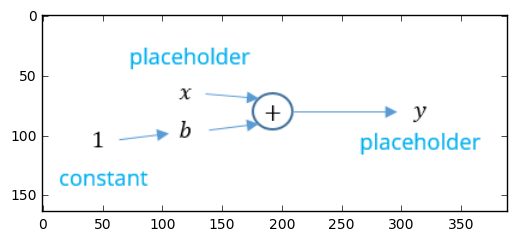

In [5]:
computational_graph = imread('tensorflow1.png')  # This is just for viewing images
plt.imshow(computational_graph)   # this is just for viewing images

x and b are edges, They could be constants or placeholders that allow data feeding during session running on tensorflow. + is a node in computational graphs but they are called operations in tensorflow.

In [9]:
# let's start from the basics
# stage 1: Define your computational graph
a = tf.constant(5, name="input_a") # an operation, op for short, input -> scalar number 5, output -> tensor object
b = tf.constant(3, name="input_b") # actually input nodes with an edge of value 3 flowing in and tensor flowing out.
print b # print to be sure it's a tensor object
c = tf.mul(a,b, name="mul_c") # a node supplied as input to another node. tensor flowing in and tensor flowing out.
d = tf.add(a,b, name="add_d") # hence the name tensorflow.
e = tf.add(c,d, name="add_e") # takes in node c and d as input. finaal output node.


Tensor("input_b:0", shape=(), dtype=int32)


In [10]:
# stage 2: run your graph
sess = tf.Session()
sess.run(e) # supply the output node

23

In [11]:
# cool stuff: You can run any of the nodes.
sess.run(d)

8

In [12]:
sess.run(c)

15

Tensorflow has a cool feature called tensorboard for visualizing the computational graph created

In [13]:
writer = tf.summary.FileWriter('./my_graph', sess.graph)
writer.close()
sess.close()

So one can run a command that can basically allow viewing on the browser.
    
    tensorboard --logdir="my_graph"
    
Then navigating to 0.0.0.0:6006 on your browser would allow you to view the graph on the graphs tab.    

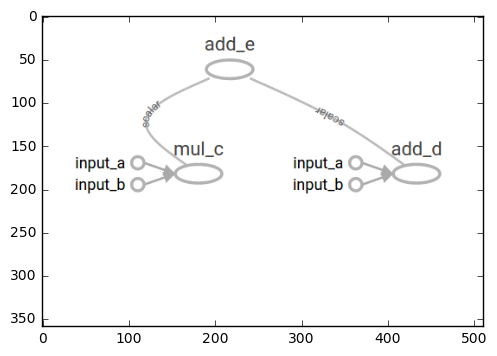

In [14]:
# let's see how it look like
graph_run = imread("graph-run.png") 
plt.imshow(graph_run)

It's called tensorflow, so we got the flow. How about the tensor?

Well tensors are simply n-dimensional matrices, where n is an integer.

so a vector , [x] is a one-dimensional tensor

a 2D matrix, [x, y] is a two-dimensional tensor.

from 3D henceforth they are also called tensors, but 3D vectors are actaully called tensors in linear algebra

In [15]:
# let's take the advantage of the tensor aspect of tensorflow.
a = tf.constant([5,3], name="input_a")   # a one dimensional tensor
b = tf.reduce_prod(a, name="prod_b")  # multiply all the elements of a given tensor
c = tf.reduce_sum(a, name="add_c")  # adds all the elements of a given tensor. like np.sum
d = tf.add(b,c, name="add_d")  

In [16]:
with tf.Session() as sess:   # Better approach in case you forget to close tensorflow session
    result = sess.run(d)
    print result

23




Let's try to create a __fibonnacci sequence__ with TensorFlow:

the fibonnacci sequence is defined by the equation: 
$$F_{n} = F_{n-1} + F_{n-2}$$<br>
Resulting in a sequence like: 1,1,2,3,5,8,13,21...

In [17]:
f = [tf.constant(1),tf.constant(1)]

for i in range(2,10):
    temp = f[i-1] + f[i-2]
    f.append(temp)

with tf.Session() as sess:
    result = sess.run(f)
    print result

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


Let's try a function that always produces a list of even number in a __fibonnacci-like__ manner:

$$F_{n} = F_{n-1} + 2$$


In [18]:
a = [tf.constant(2)]

for i in range(10):
    a.append(a[len(a)-1] + 2)
    
with tf.Session() as sess:
    result = sess.run(a)
    print result


[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]


## End for Now

### References

1. [TensorFlow For Machine Intelligence hands on Introduction.](https://www.amazon.com/TensorFlow-Machine-Intelligence-hands-introduction-ebook/dp/B01IZ43JV4)

2. [Big Data University's Deep Learning with TensorFlow](https://bigdatauniversity.com/courses/deep-learning-tensorflow/)